# Tutorial <br>

Before starting, remember to activate the environment:  <br>
**source env/bin/activate**




In [1]:
from intrinsic_dimension import intrinsic_dimension, section_id, secondary_structure_id
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import seaborn as sns
import logging
from moleculekit.molecule import Molecule

## Computing Intrinsic Dimension

<h4><p style=' color:MediumVioletRed;' >Example 1</h4>   <br>  

Load topology and trajectory (minimum 101 frames). <br> 

Metrics "Distances" and "Dihedrals" have default parameters: <br>  
- Distances = "sele": "name CA", "step": 1, "metric": "distances"  <br>
- Dihedrals = "dihedrals": ("phi", "psi"), "sincos": False <br>

Similarly, "local" and "global" intrinsic dimension methods have default parameters (valid for both): <br>
- "estimator": "TwoNN"  <br>
- "last": int(100)  <br>


In [ ]:
mean_all, mean_last, local_id = intrinsic_dimension(topology = 'myoglobin/myo_noh_1dwr_tip4p.pdb', trajectory = ('myoglobin/myo_noh_300.xtc'), projection_method='Dihedrals', id_method='local')

print('Mean instantaneous ID of the entire trajectory:', mean_all)
print('Mean instantaneous ID of the last 100 frames:', mean_last)
print('Istantaneous ID of the entire trajectory:', local_id)

intrinsic_dimension.intrinsic_dimension - INFO - Built-in projection "Dihedrals" computed.
intrinsic_dimension.intrinsic_dimension - INFO - Computing local intrinsic dimension using estimator "TwoNN" (last simulation section = 100 frames).


Mean instantaneous ID of the entire trajectory: 12.462616524212551
Mean instantaneous ID of the last 100 frames: 12.464813064235308
Istantaneous ID of the entire trajectory: [12.63938514 12.25231996 12.52420405 12.63647994 12.25718849 12.65279308
 12.27447019 12.29728478 12.3920995  12.6443908  12.33743311 12.62313694
 12.59588149 12.61086086 12.63647994 12.30896116 12.39032541 12.32803955
 12.67309519 12.38127276 12.42895588 12.4441556  12.38935018 12.32086401
 12.30633109 12.36304428 12.58047446 12.34925244 12.38639616 12.33750467
 12.54531956 12.48210522 12.34189931 12.32718267 12.65938848 12.34083897
 12.37700326 12.44867408 12.51214286 12.54531956 12.3615692  12.59232612
 12.575202   12.42502844 12.66152104 12.61355024 12.42785341 12.58047446
 12.38654061 12.54793309 12.5690502  12.47300748 12.41210197 12.47893536
 12.6168491  12.46253282 12.51872209 12.38194228 12.53170013 12.34132266
 12.61124999 12.3983702  12.5555489  12.31860753 12.43034285 12.56013823
 12.5566211  12.4087940

<h4><p style=' color:MediumVioletRed;' >Example 2</h4> <br>

Create a Moleculekit Molecule object outside the function.

In [13]:
#load molecule and trajectory first
mol = Molecule('myoglobin/myo_noh_1dwr_tip4p.pdb', validateElements = False) #validateElements ignores the atom type (needed for tip4p's "M" particle)
mol.read('myoglobin/myo_noh_300.xtc')

mean_all, mean_last, local_id = intrinsic_dimension(mol = mol, projection_method='Dihedrals', id_method='local')

print('Mean instantaneous ID of the entire trajectory:', mean_all)
print('Mean instantaneous ID of the last 100 frames:', mean_last)
print('Istantaneous ID of the entire trajectory:', local_id)

intrinsic_dimension.intrinsic_dimension - INFO - Built-in projection "Dihedrals" computed.
intrinsic_dimension.intrinsic_dimension - INFO - Computing local intrinsic dimension using estimator "TwoNN" (last simulation section = 100 frames).


Mean instantaneous ID of the entire trajectory: 12.462616524212551
Mean instantaneous ID of the last 100 frames: 12.464813064235308
Istantaneous ID of the entire trajectory: [12.63938514 12.25231996 12.52420405 12.63647994 12.25718849 12.65279308
 12.27447019 12.29728478 12.3920995  12.6443908  12.33743311 12.62313694
 12.59588149 12.61086086 12.63647994 12.30896116 12.39032541 12.32803955
 12.67309519 12.38127276 12.42895588 12.4441556  12.38935018 12.32086401
 12.30633109 12.36304428 12.58047446 12.34925244 12.38639616 12.33750467
 12.54531956 12.48210522 12.34189931 12.32718267 12.65938848 12.34083897
 12.37700326 12.44867408 12.51214286 12.54531956 12.3615692  12.59232612
 12.575202   12.42502844 12.66152104 12.61355024 12.42785341 12.58047446
 12.38654061 12.54793309 12.5690502  12.47300748 12.41210197 12.47893536
 12.6168491  12.46253282 12.51872209 12.38194228 12.53170013 12.34132266
 12.61124999 12.3983702  12.5555489  12.31860753 12.43034285 12.56013823
 12.5566211  12.4087940

<h4><p style=' color:MediumVioletRed;' >Example 3</h4> <br>

Define extra arguments (or modify the default ones). <br> 
Kwargs are organised in: <br>
- projection_kwargs(), referred to the projection type selected; <br>
- id_kwargs(), referred to the intrinsic dimension computation (local/global parameters).<br>

projection_kwargs are required in all cases exccept Dihedrals and Distances, which have default parameters as described in example 1.

In [14]:

#load molecule and trajectory
mol = Molecule('myoglobin/myo_noh_1dwr_tip4p.pdb', validateElements = False) #validateElements ignores the atom type (needed for tip4p's M particle)
mol.read('myoglobin/myo_noh_300.xtc')

proj = {'atomsel':'name CA','refmol':mol} #kwargs required by Coordinate method
global_all, global_last100 = intrinsic_dimension(mol=mol, projection_method='Coordinate', id_method='global', projection_kwargs=proj)

print('Global ID of the entire trajectory:', global_all)
print('Global ID of the last 100 frames:', global_last100)

2025-07-10 16:26:02,571 - moleculekit.molecule - WARNING - Wrapping detected 80 bonds and 2484 atoms. Ignore this message if you believe this is correct, otherwise make sure you have loaded a topology containing all the bonds of the system before wrapping. The results may be inaccurate. If you want to use guessed bonds use the guessBonds argument.


intrinsic_dimension.intrinsic_dimension - INFO - Used moleculekit metric projection: MetricCoordinate from moleculekit.projections.metriccoordinate
intrinsic_dimension.intrinsic_dimension - INFO - Computing global intrinsic dimension using estimator "TwoNN" (last simulation section = 100 frames).


Global ID of the entire trajectory: 18.635546971814737
Global ID of the last 100 frames: 19.774953097601355


## Computing Intrinsic Dimension of Protein's Section

<h4><p style=' color:MediumVioletRed;' >Example 4</h4>  <br>

Similar to intrinisc_dimension(), with two extra parameters required: <br>
- window_size (default 10); <br>
- stride (default 1). <br>

Returns a DataFrame.



In [2]:
results = section_id(topology = 'myoglobin/myo_noh_1dwr_tip4p.pdb', trajectory = 'myoglobin/myo_noh_300.xtc', window_size=15, stride=5 , projection_method='Dihedrals', id_method='local')
print(f'ID table: \n {results.head()}')

intrinsic_dimension.section_id - INFO - Protein has 153 amino acids. Slicing in 28 windows of 15 amino acids each and 5 aminos stride.
intrinsic_dimension.section_id - INFO - Last 3 amino acids will be ingored.
intrinsic_dimension.section_id - INFO - Computing local Intrinsic Dimension from Dihedrals.


ID table: 
    start  end  entire simulation  last simulation  \
0      1   15          11.872584        11.873683   
1      6   20          14.235811        14.227232   
2     11   25          13.710344        13.710242   
3     16   30          11.447558        11.446090   
4     21   35          15.543218        15.546694   

                                       instantaneous  
0  [11.939727047363164, 11.798754784735072, 11.78...  
1  [14.273448472706413, 14.179781494335032, 14.23...  
2  [13.714371247585445, 13.728933659292691, 13.71...  
3  [11.467234954601087, 11.440515743129188, 11.44...  
4  [15.52633910496367, 15.535759239711869, 15.568...  


## Computing Intrinsic Dimension of Protein's Secondary Structures

<h4><p style=' color:MediumVioletRed;' >Example 5</h4>  <br>

Similar to intrinisc_dimension(), with one extra parameters required: <br>
- simplified (default = True) return a simplified list of DSSP; <br>

Returns two DataFrames:
1. with the ID results
2. with the list of secondary structure elements per amido acid.



In [3]:
results, secStr =secondary_structure_id(topology = 'myoglobin/myo_noh_1dwr_tip4p.pdb', trajectory = 'myoglobin/myo_noh_300.xtc', simplified = True , projection_method='Dihedrals', id_method='local')

print(f'ID table:\n {results.head(5)}')
print(f'\n Secondary structure assignments:\n {secStr.head(5)}')

intrinsic_dimension.secondary_structure_id - INFO - Secondary structures considered: Coil (C), Strand (E) and Helix (H).


intrinsic_dimension.secondary_structure_id - INFO - Computing local Intrinsic Dimension from Dihedrals.
intrinsic_dimension.secondary_structure_id - WARNING - Skipping segment 58-58: at least two residues per segment are required.


ID table:
    window start  window end sec str type  entire simulation  last simulation  \
0             1           3            C           4.105764         4.107474   
1             4          35            H          18.565015        18.570911   
2            36          39            C           5.612415         5.612067   
3            40          42            H           3.479548         3.479429   
4            43          51            C          10.795216        10.810527   

                                       instantaneous  
0  [4.145378312376205, 4.033893634747908, 4.03220...  
1  [18.53909107238954, 18.593916204847854, 18.599...  
2  [5.629159984545188, 5.636501460985435, 5.62703...  
3  [3.5125887516349446, 3.4612041804980094, 3.514...  
4  [10.818688172443375, 10.498556078802512, 10.56...  

 Secondary structure assignments:
    resid index resname sec str type
0            1     GLY            C
1            2     LEU            C
2            3     SER            

## Plotting Intrinsic Dimension

<h4><p style=' color:MediumVioletRed;' >Example 6</h4>   


In [ ]:
states = [300, 340, 380, 420, 460, 500]
colors = plt.cm.RdYlBu_r(np.linspace(0, 1, len(states)))
state_ids = []
fig, ax = plt.subplots(figsize=(15, 5), ncols=2)
fig.suptitle("Instantaneous Intrinsic Dimension", fontsize=16) 

for i, s in enumerate(states):
    mean_all, mean_last, local_id = intrinsic_dimension(topology='myoglobin/myo_noh_1dwr_tip4p.pdb', trajectory=f'myoglobin/myo_noh_{s}.xtc', projection_method='Distances', id_method='local', projection_kwargs={'step': 1}, verbose=True)
    frames = np.arange(len(local_id)) 
    state_ids.append(local_id)

    ax[0].plot(frames, local_id, label=f"{s}", color=colors[i], linewidth=0.8)
ax[0].set_xlabel("Frames")
ax[0].set_ylabel("Local ID")
ax[0].set_title("Time")
#x[0].legend(bbox_to_anchor=(1.2, 0.5), loc="center right", title='Trajectory')       

#####################

all_values = np.concatenate(state_ids)  # common bin width
bins = np.linspace(all_values.min(), all_values.max(), 30)
for i, local_id in enumerate(state_ids):
    ax[1].hist(local_id, bins=bins, alpha=0.7, label=f"{i}", color=colors[i], edgecolor='black', linewidth=0.5)
ax[1].set_xlabel("Local ID")
ax[1].set_ylabel("#")
ax[1].set_title("Frequency")
ax[1].legend(bbox_to_anchor=(1.25, 0.5), loc="center right", title='Trajectory')

plt.tight_layout()
plt.show()

intrinsic_dimension.intrinsic_dimension - INFO - Built-in projection "Distances" computed.
intrinsic_dimension.intrinsic_dimension - INFO - Computing local intrinsic dimension using estimator "TwoNN" (last simulation section = 100 frames).


intrinsic_dimension.intrinsic_dimension - INFO - Built-in projection "Distances" computed.
intrinsic_dimension.intrinsic_dimension - INFO - Computing local intrinsic dimension using estimator "TwoNN" (last simulation section = 100 frames).
intrinsic_dimension.intrinsic_dimension - INFO - Built-in projection "Distances" computed.
intrinsic_dimension.intrinsic_dimension - INFO - Computing local intrinsic dimension using estimator "TwoNN" (last simulation section = 100 frames).
intrinsic_dimension.intrinsic_dimension - INFO - Built-in projection "Distances" computed.
intrinsic_dimension.intrinsic_dimension - INFO - Computing local intrinsic dimension using estimator "TwoNN" (last simulation section = 100 frames).
intrinsic_dimension.intrinsic_dimension - INFO - Built-in projection "Distances" computed.
intrinsic_dimension.intrinsic_dimension - INFO - Computing local intrinsic dimension using estimator "TwoNN" (last simulation section = 100 frames).
intrinsic_dimension.intrinsic_dimension 

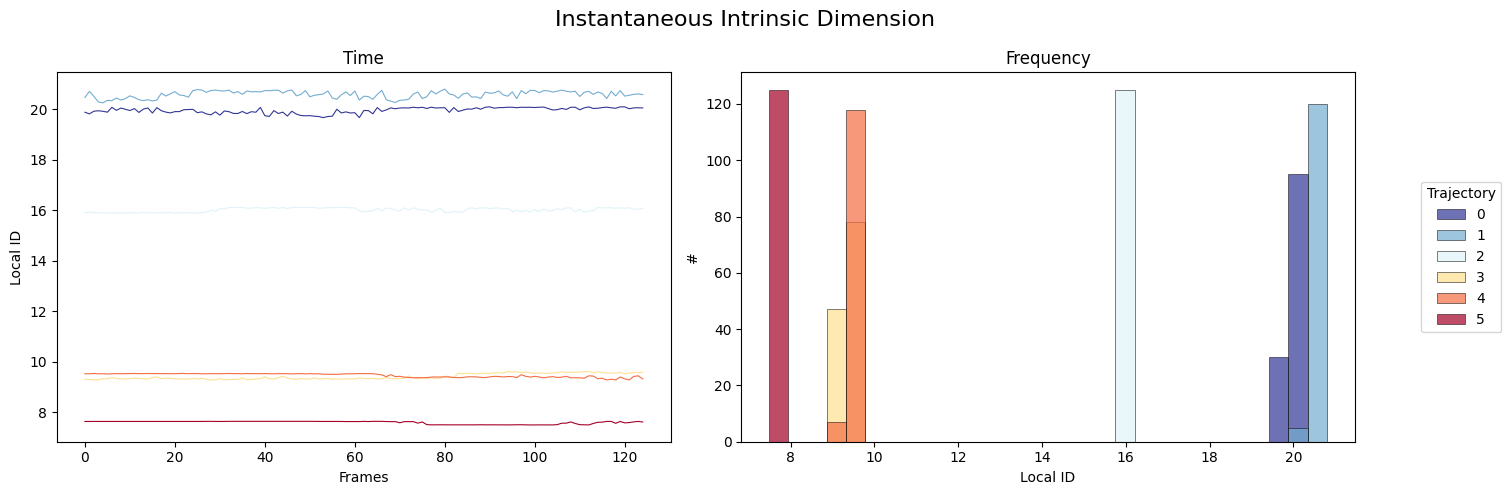

In [2]:
states = [300, 340, 380, 420, 460, 500]
colors = plt.cm.RdYlBu_r(np.linspace(0, 1, len(states)))
state_ids = []
fig, ax = plt.subplots(figsize=(15, 5), ncols=2)
fig.suptitle("Instantaneous Intrinsic Dimension", fontsize=16) 

for i, s in enumerate(states):
    mean_all, mean_last, local_id = intrinsic_dimension(topology='myoglobin/myo_noh_1dwr_tip4p.pdb', trajectory=f'myoglobin/myo_noh_{s}.xtc', projection_method='Distances', id_method='local', projection_kwargs={'step': 3}, verbose=True)
    frames = np.arange(len(local_id)) 
    state_ids.append(local_id)

    ax[0].plot(frames, local_id, label=f"{s}", color=colors[i], linewidth=0.8)
ax[0].set_xlabel("Frames")
ax[0].set_ylabel("Local ID")
ax[0].set_title("Time")
#x[0].legend(bbox_to_anchor=(1.2, 0.5), loc="center right", title='Trajectory')       

#####################

all_values = np.concatenate(state_ids)  # common bin width
bins = np.linspace(all_values.min(), all_values.max(), 30)
for i, local_id in enumerate(state_ids):
    ax[1].hist(local_id, bins=bins, alpha=0.7, label=f"{i}", color=colors[i], edgecolor='black', linewidth=0.5)
ax[1].set_xlabel("Local ID")
ax[1].set_ylabel("#")
ax[1].set_title("Frequency")
ax[1].legend(bbox_to_anchor=(1.25, 0.5), loc="center right", title='Trajectory')

plt.tight_layout()
plt.show()

In [3]:
mean_all, mean_last, local_id = intrinsic_dimension(topology = 'myoglobin/myo_noh_1dwr_tip4p.pdb', trajectory = 'myoglobin/myo_noh_300.xtc', projection_method='Distances', id_method='local')

time = np.arange(0, len(local_id))
plt.figure(figsize=(8, 5))
plt.plot(time, local_id, linestyle='-', color='teal', linewidth= 1.5)
plt.xlabel("Time (frames)")
plt.ylim(min(local_id) -0.1, max(local_id) + 0.1)
plt.ylabel("Local ID")
plt.title("Instantaneous Intrinsic Dimension")
#plt.grid(True)
plt.tight_layout()
plt.show()

intrinsic_dimension.intrinsic_dimension - INFO - Built-in projection "Distances" computed.
intrinsic_dimension.intrinsic_dimension - INFO - Computing global intrinsic dimension using estimator "TwoNN" (last simulation section = 100 frames).


ValueError: not enough values to unpack (expected 3, got 2)

<h4><p style=' color:MediumVioletRed;' >Example 7</h4>   <br>

Using multiple, indipendent trajectory. In this case, with varying temperatures.




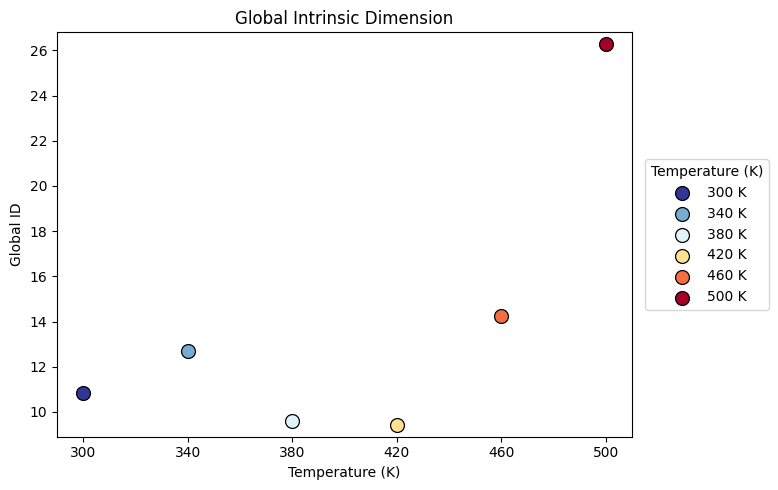

In [18]:
proj = {'dihedrals':'psi'} #changed default angles to compute
temperatures=[300, 340, 380, 420, 460, 500]
results=[]
for t in temperatures: #using verbose=False to remove multiple logging infos
    global_all, gid100 = intrinsic_dimension(topology='myoglobin/myo_noh_1dwr_tip4p.pdb', trajectory=f'myoglobin/myo_noh_{t}.xtc', projection_method='Dihedrals', id_method='global' , projection_kwargs=proj, verbose=False)
    results.append({
        'temperature': t,
        'mean_all': global_all,
        'mean_last': gid100,
            })
results=pd.DataFrame(results)
    
plt.figure(figsize=(8, 5))
color_vec = np.linspace(0, 1, len(temperatures))
color = cm.RdYlBu_r(color_vec)
for t, c in zip(results['temperature'], color):
    value = results[results['temperature'] == t]['mean_all'].values[0]
    plt.scatter(t, value, color=c, edgecolor='black', linewidth=0.9, s=100, label=f'{t} K')
plt.xlabel("Temperature (K)")
plt.xticks(temperatures)
plt.ylim(min(results['mean_all']) -0.5, max(results['mean_all']) + 0.5)
plt.ylabel("Global ID")
plt.title("Global Intrinsic Dimension")
plt.legend(bbox_to_anchor=(1.25, 0.5), loc="center right", title="Temperature (K)")
plt.tight_layout()
_=plt.show()

<h4><p style=' color:MediumVioletRed;' >Example 8</h4>   <br> 
Plotting protein's ID by sections. <br>


intrinsic_dimension.section_id - INFO - Protein has 153 amino acids. Slicing in 28 windows of 15 amino acids each and 5 aminos stride.
intrinsic_dimension.section_id - INFO - Last 3 amino acids will be ingored.
intrinsic_dimension.section_id - INFO - Computing local Intrinsic Dimension from Dihedrals.


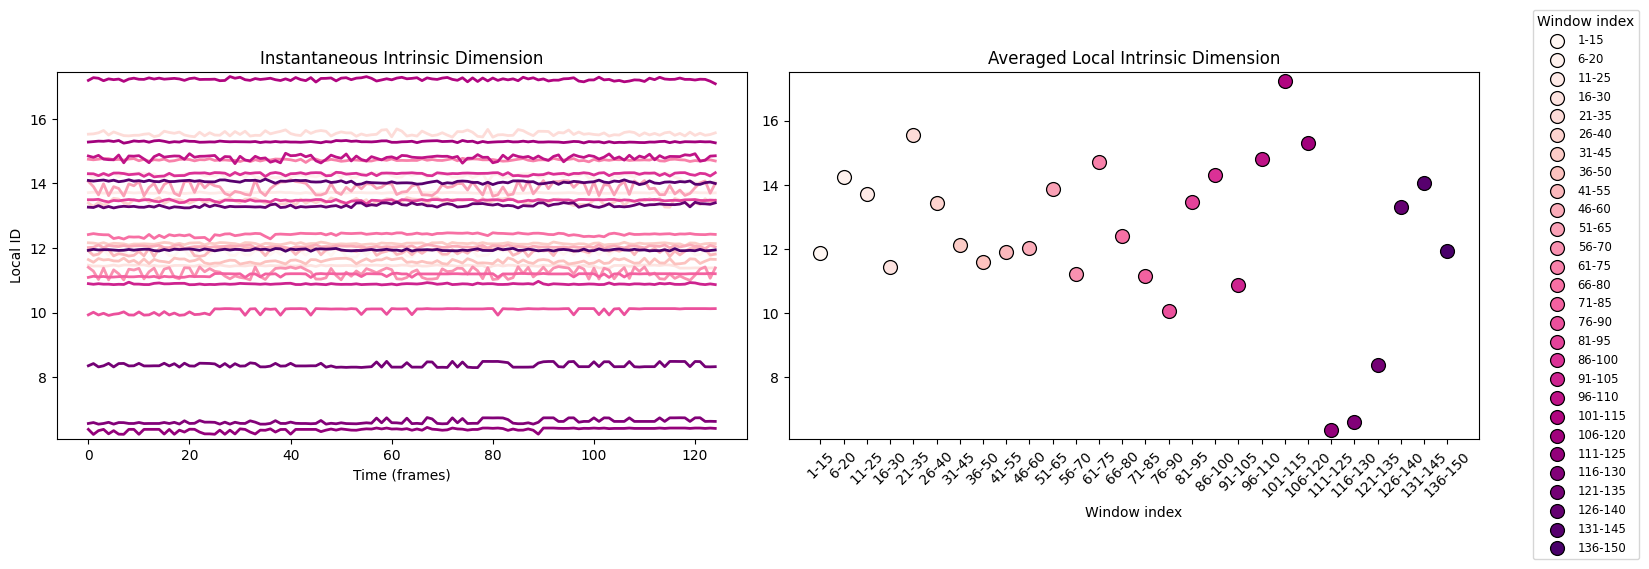

In [ ]:
results = section_id(topology = 'myoglobin/myo_noh_1dwr_tip4p.pdb', trajectory = 'myoglobin/myo_noh_300.xtc', window_size=15, stride=5 , projection_method='Dihedrals', id_method='local')

#IGNORE (remove matplotlib info warning)
logging.basicConfig(level='INFO')
mlogger = logging.getLogger('matplotlib')
mlogger.setLevel(logging.WARNING)

fig, ax = plt.subplots(nrows=1, ncols=2 , figsize=(15, 5) )
time = np.arange(0, len(results['instantaneous'][0])) #length of the simulation is the same for every section
cmap = plt.cm.RdPu
colors = cmap(np.linspace(0, 1, len(results)))
# ===== PLOT 1 =====
for (idx, row), color in zip(results.iterrows(), colors):
    ax[0].plot(time,row['instantaneous'],color=color, linewidth= 2)
ax[0].set_xlabel("Time (frames)")
all_values = np.concatenate(results["instantaneous"].values)
ax[0].set_ylim(all_values.min() - 0.15, all_values.max() + 0.15)
ax[0].set_ylabel("Local ID")
ax[0].set_title("Instantaneous Intrinsic Dimension")

# ===== PLOT 2 =====
for (start, end), c in zip(zip(results['start'], results['end']), colors):
    label = f"{start}-{end}"
    value = results[(results['start'] == start) & (results['end'] == end)]['entire simulation']
    ax[1].scatter(label, value.values[0], color=c, edgecolor='black', linewidth=0.9, s=100, label=label)
ax[1].set_xlabel('Window index')
ax[1].set_ylim(results['entire simulation'].min() - 0.3, results['entire simulation'].max() + 0.3)
ax[1].set_title("Averaged Local Intrinsic Dimension")
for tick in ax[1].get_xticklabels():
    tick.set_rotation(45)
handles, labels = ax[1].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.10, 0.5), loc='center right', fontsize='small', title='Window index')
plt.tight_layout()
fig.show()


<h4><p style=' color:MediumVioletRed;' >Example 9</h4>

Plotting protein ID's from multiple MD simulations (different temperatures) divided by window. 


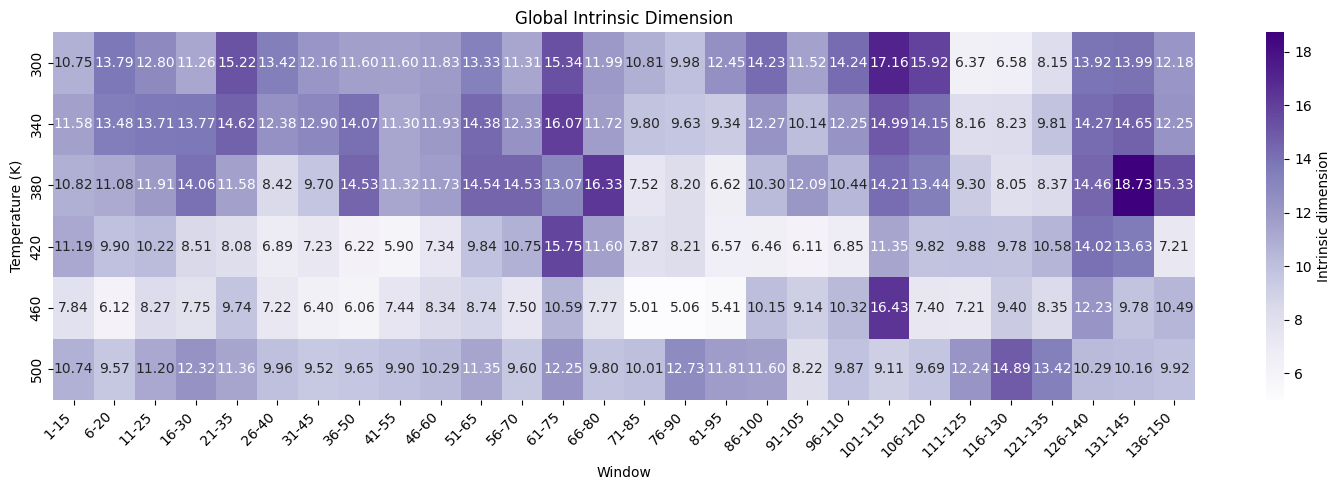

In [10]:
temperatures = [300, 340, 380, 420, 460, 500]
results=[]

for t in temperatures:
    result = section_id(topology='myoglobin/myo_noh_1dwr_tip4p.pdb', trajectory=f'myoglobin/myo_noh_{t}.xtc', window_size=15, stride=5, projection_method='Dihedrals', id_method='global', verbose = False )
    result['temperature'] = t
    results.append(result)
combined_results = pd.concat(results, ignore_index=True)
combined_results["window"] = (combined_results["start"].astype(str) + "-" + combined_results["end"].astype(str))

grouped_data = combined_results.groupby(['temperature', 'window'], as_index=False)['entire simulation'].mean()
grouped_data.rename(columns={'temperature': 'Temperature $T$ (K)','Window': 'window'}, inplace=True)
pivot_data = grouped_data.pivot(index='Temperature $T$ (K)', columns='window', values='entire simulation')
ordered_cols = sorted(pivot_data.columns, key=lambda w: int(w.split("-")[0]))
pivot_data = pivot_data[ordered_cols]
plt.figure(figsize=(15, 5)) 
_=sns.heatmap(pivot_data, cmap = "Purples", annot = True,fmt=".2f", cbar_kws={'label': 'Intrinsic dimension'}) #, square=True
plt.ylabel("Temperature (K)")
plt.xlabel("Window")
plt.xticks(rotation=45, ha='right')
plt.title("Global Intrinsic Dimension")
plt.tight_layout()
_=plt.show()



<h4><p style=' color:MediumVioletRed;' >Example 10</h4>   <br> 

Plotting protein's ID by secondary structure. <br>

intrinsic_dimension.secondary_structure_id - INFO - Secondary structures considered: Coil (C), Strand (E) and Helix (H).
intrinsic_dimension.secondary_structure_id - INFO - Computing local Intrinsic Dimension from Dihedrals.
intrinsic_dimension.secondary_structure_id - WARNING - Skipping segment 58-58: at least two residues per segment are required.


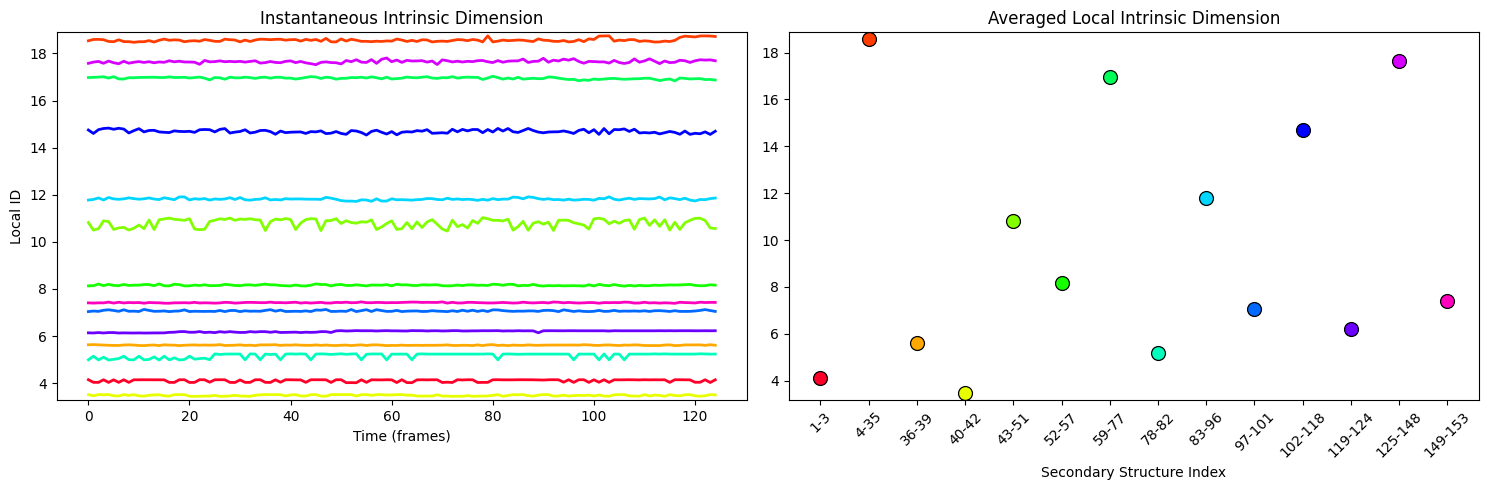

In [ ]:
results, secStr = secondary_structure_id(topology = 'myoglobin/myo_noh_1dwr_tip4p.pdb', trajectory = 'myoglobin/myo_noh_300.xtc', projection_method='Dihedrals', id_method='local', verbose = True)

#IGNORE (remove matplotlib info warning)
logging.basicConfig(level='INFO')
mlogger = logging.getLogger('matplotlib')
mlogger.setLevel(logging.WARNING)

fig, ax = plt.subplots(nrows=1, ncols=2 , figsize=(15, 5) )
time = np.arange(0, len(results['instantaneous'][0])) #length of the simulation is the same for every secondary str
cmap = plt.cm.gist_rainbow
colors = cmap(np.linspace(0, 1, len(results)))
# ===== PLOT 1 =====
for (idx, row), color in zip(results.iterrows(), colors):
    ax[0].plot(time, row['instantaneous'],color=color, linewidth= 2)
ax[0].set_xlabel("Time (frames)")
all_values = np.concatenate(results['instantaneous'].values)
ax[0].set_ylim(all_values.min() - 0.15, all_values.max() + 0.15)
ax[0].set_ylabel("Local ID")
ax[0].set_title("Instantaneous Intrinsic Dimension")
# ===== PLOT 2 =====
for (start, end), c in zip(zip(results['start'], results['end']), colors):
    label = f'{start}-{end}'
    value = results[(results['start'] == start) & (results['end'] == end)]['entire simulation']
    ax[1].scatter(label, value.values[0], color = c, edgecolor = 'black', linewidth = 0.9, s = 100, label = label)
ax[1].set_xlabel('Secondary Structure Index')
ax[1].set_ylim(results['entire simulation'].min() - 0.3, results['entire simulation'].max() + 0.3)
ax[1].set_title("Averaged Local Intrinsic Dimension")
for tick in ax[1].get_xticklabels():
    tick.set_rotation(45)
#handles, labels = ax[1].get_legend_handles_labels()
#fig.legend(handles, labels,bbox_to_anchor=(1.10, 0.5), loc='center right', fontsize='small', title='Sec. Str. Index')
plt.tight_layout()
fig.show()


<h4><p style=' color:MediumVioletRed;' >Example 11</h4>   <br>
Plotting protein ID's from multiple MD simulations (different temperatures) divided by secondary structure.

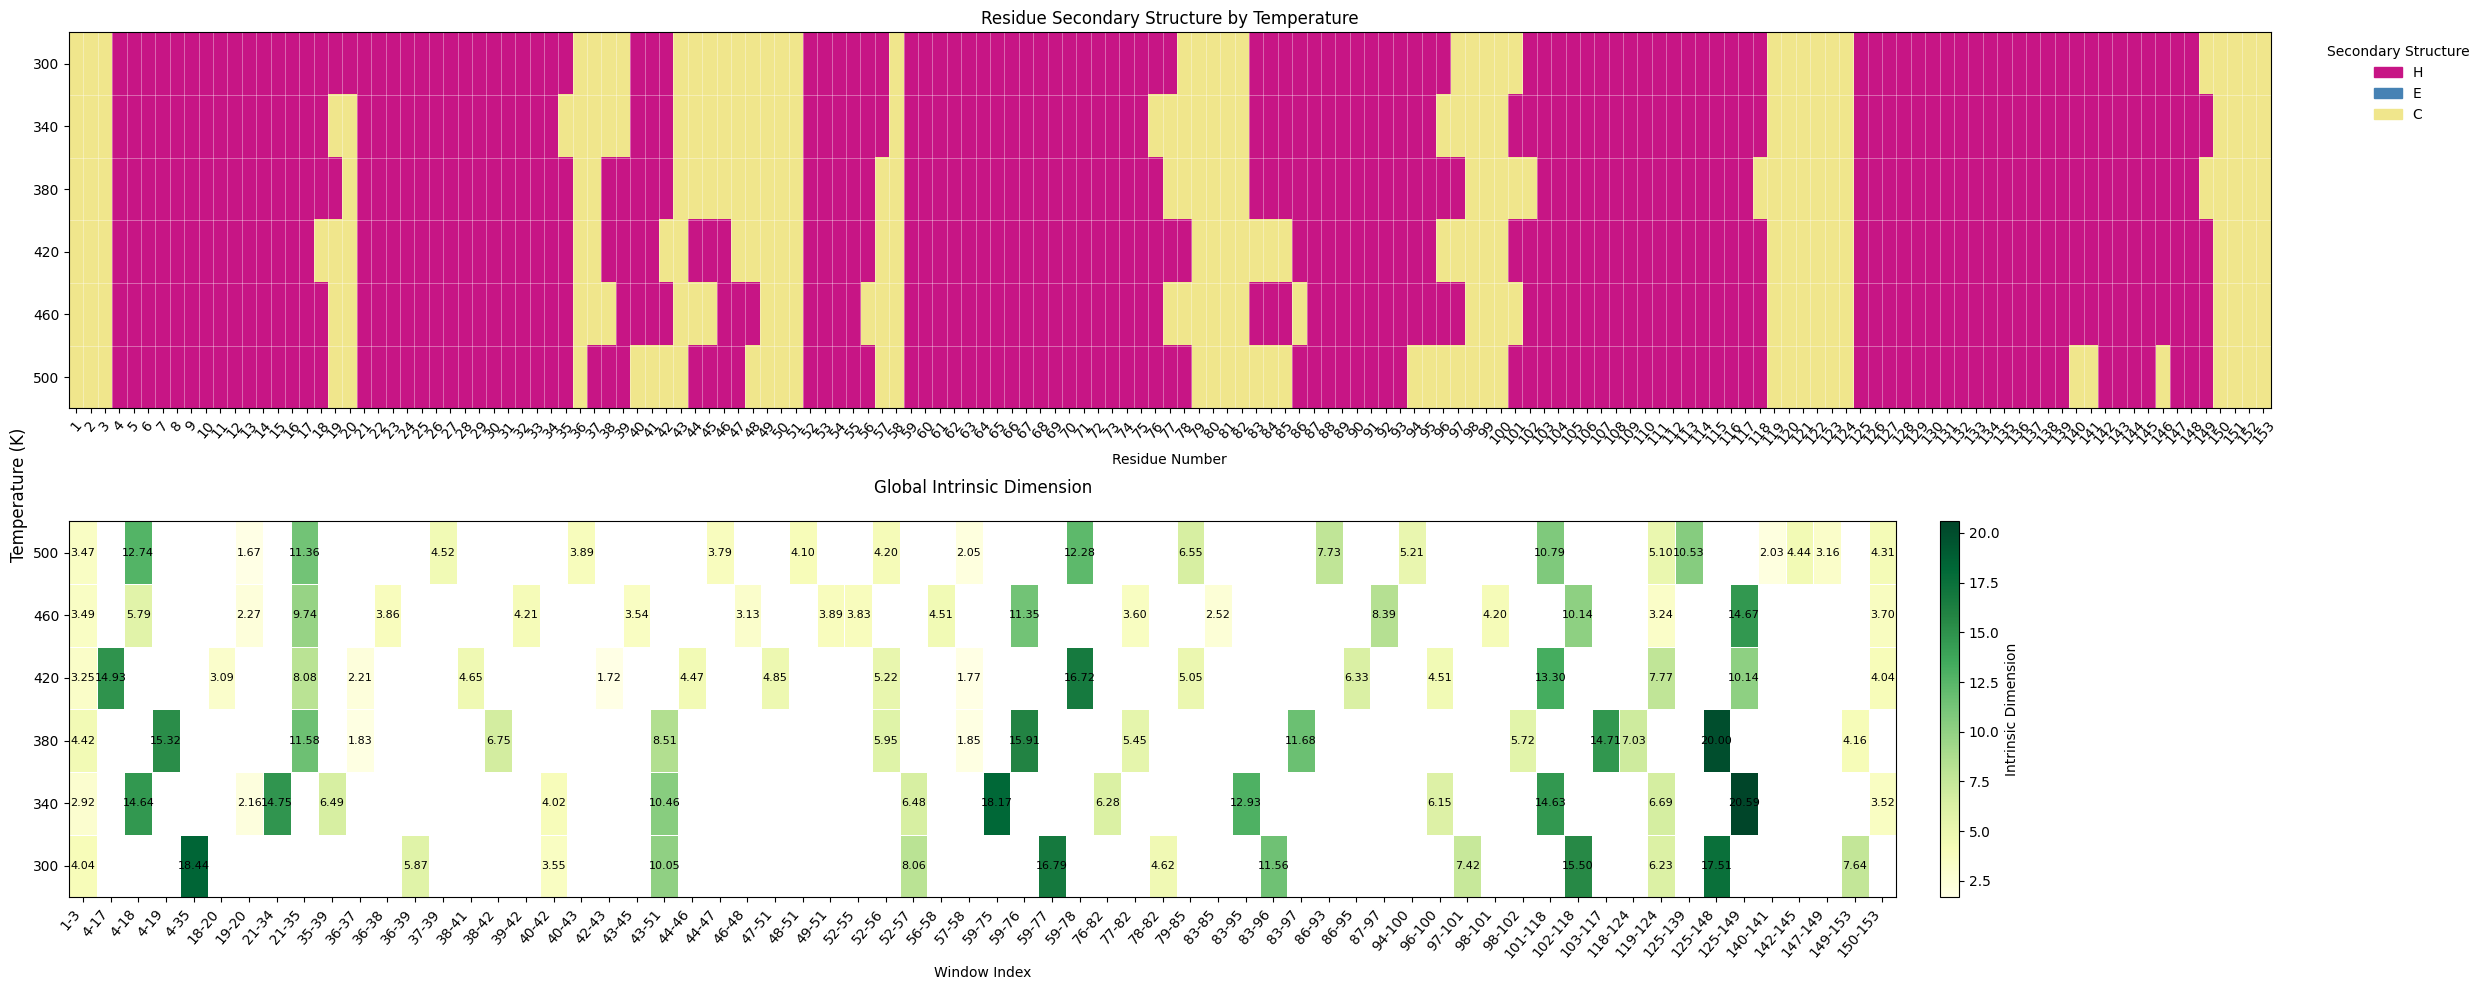

In [8]:
temperatures = [300, 340, 380, 420, 460, 500]
ss_types = ['H', 'E', 'C']
ss_colors = {'H': 'mediumvioletred', 'E': 'steelblue', 'C': 'khaki'}
ss_assignments = []
results = []
residue_numbers = None
for t in temperatures:
    result, ss_table = secondary_structure_id(topology='myoglobin/myo_noh_1dwr_tip4p.pdb', trajectory=f'myoglobin/myo_noh_{t}.xtc', projection_method='Dihedrals', id_method='global', verbose=False)   
    if residue_numbers is None:
        residue_numbers = ss_table['resid index'].values
    ss_assignments.append(ss_table['sec str type'].values)
    result['temperature'] = t
    results.append(result)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 10))

# ===== PLOT 1: Secondary Structure Assignments =====
ss_to_num = {ss: i for i, ss in enumerate(ss_types)}
num_data = np.array([[ss_to_num[ss] for ss in row] for row in ss_assignments])
cmap = ListedColormap([ss_colors[ss] for ss in ss_types])
im = ax1.imshow(num_data, aspect='auto', cmap=cmap, extent=[residue_numbers[0]-0.5, residue_numbers[-1]+0.5, len(temperatures)-0.5, -0.5])
for x in np.arange(residue_numbers[0]-0.5, residue_numbers[-1]+1.5, 1):
    ax1.axvline(x=x, color='white', linewidth=0.5, alpha=0.5)
for y in np.arange(-0.5, len(temperatures)+0.5, 1):
    ax1.axhline(y=y, color='white', linewidth=0.5, alpha=0.5)
ax1.grid(False)
ax1.set_xticks(residue_numbers)
ax1.set_yticks(np.arange(len(temperatures)))
ax1.set_yticklabels([f"{t}" for t in temperatures])
ax1.set_xlabel('Residue Number')
ax1.set_title('Residue Secondary Structure by Temperature')
ax1.tick_params(axis='x', rotation=50)  

legend_elements = [plt.Rectangle((0,0), 1, 1, color=ss_colors[ss], label=ss) for ss in ss_types]
ax1.legend(handles=legend_elements, bbox_to_anchor=(1.02, 1), loc='upper left', title='Secondary Structure', frameon=False, facecolor='white')

# ===== PLOT 2: Intrinsic Dimension Heatmap =====
combined_results = pd.concat(results, ignore_index=True)
combined_results["window"] = (combined_results["start"].astype(str) + "-" + combined_results["end"].astype(str))
grouped_data = combined_results.groupby(['temperature', 'window'], as_index=False)['entire simulation'].mean()
grouped_data.rename(columns={'temperature': 'Temperature $T$ (K)', 'Window': 'window'}, inplace=True)
pivot_data = grouped_data.pivot(index='Temperature $T$ (K)', columns='window', values='entire simulation')
ordered_cols = sorted(pivot_data.columns, key=lambda w: int(w.split("-")[0]))
pivot_data = pivot_data[ordered_cols]
x_edges = np.arange(-0.5, len(pivot_data.columns)+0.5, 1)
y_edges = np.arange(-0.5, len(pivot_data.index)+0.5, 1)
heatmap = ax2.pcolormesh(x_edges, y_edges, pivot_data.values,  cmap='YlGn',  edgecolor='white', linewidth=0.5)
for i in range(len(pivot_data.index)):
    for j in range(len(pivot_data.columns)):
        value = pivot_data.iloc[i,j]
        if not np.isnan(value):  # Only plot non-NaN values
            ax2.text(j, i, f"{value:.2f}", ha="center", va="center", color="black", fontsize=8)
ax2.set_xticks(np.arange(len(pivot_data.columns)))
ax2.set_xticklabels(pivot_data.columns, rotation=50, ha='right')
ax2.set_yticks(np.arange(len(pivot_data.index)))
ax2.set_yticklabels([f"{temp}" for temp in pivot_data.index])
ax2.set_title('Global Intrinsic Dimension', pad=20)
ax2.set_xlabel("Window Index")
ax2.grid(False)
cbar = fig.colorbar(heatmap, ax=ax2, pad=0.02)
cbar.set_label('Intrinsic Dimension')

fig.supylabel('Temperature (K)', x = 0.01)
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.show()